/tmp/ipykernel_92636/3827857234.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_july['Day'] = df_july['Date Time'].dt.day
/tmp/ipykernel_92636/3827857234.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_july['Year'] = df_july['Date Time'].dt.year


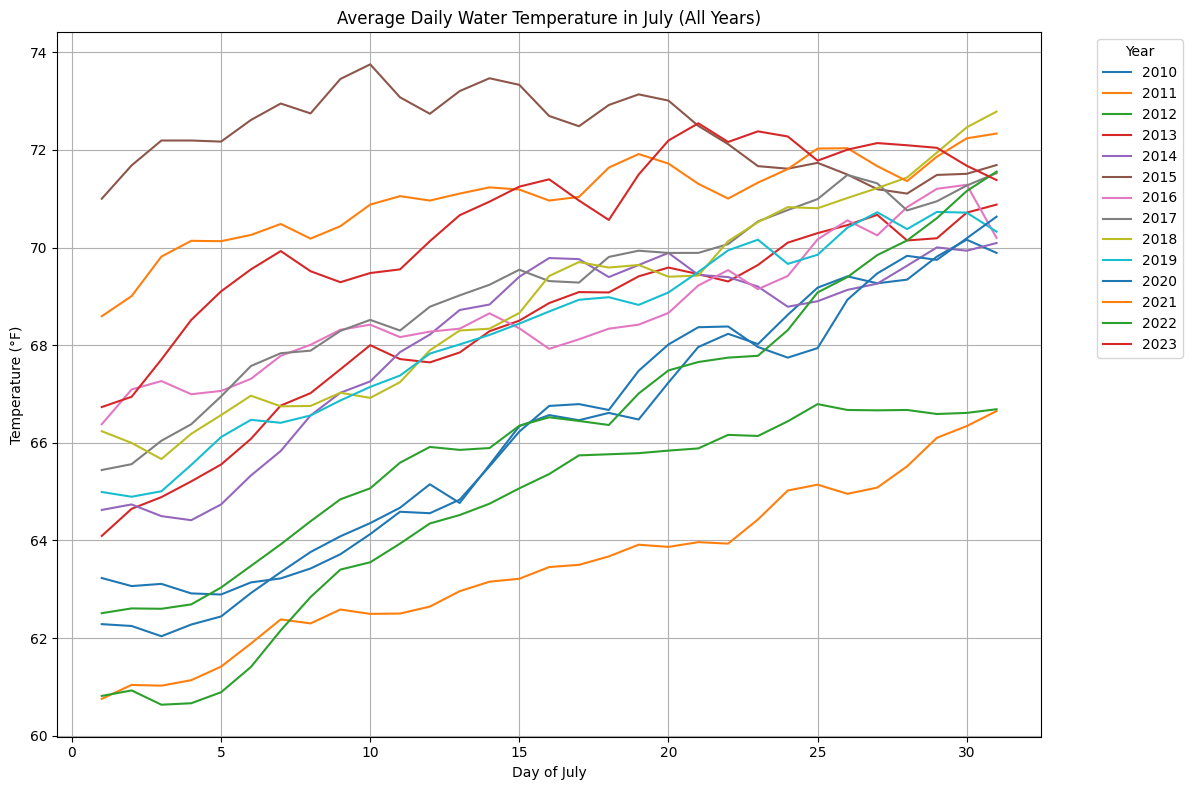

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a Pandas DataFrame
file_path = 'columbia_river_temp_dalles.csv'  # Replace with your actual file path
df = pd.read_csv(file_path, parse_dates=['Date Time'], dayfirst=True)

# Rename the temperature column for ease of use
df.rename(columns={'TDDO.Temp-Water.Inst.1Hour.0.USGS-REV [F]': 'Temperature'}, inplace=True)

# Filter the data for entries in July
df['Month'] = df['Date Time'].dt.month
df_july = df[df['Month'] == 7]

# Extract day of month and year for plotting
df_july['Day'] = df_july['Date Time'].dt.day
df_july['Year'] = df_july['Date Time'].dt.year

# Aggregate data by day and year for average daily temperature in July
df_july_daily_avg = df_july.groupby(['Year', 'Day'])['Temperature'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
years = df_july_daily_avg['Year'].unique()

for year in years:
    df_plot = df_july_daily_avg[df_july_daily_avg['Year'] == year]
    plt.plot(df_plot['Day'], df_plot['Temperature'], label=str(year))

plt.title('Average Daily Water Temperature in July (All Years)')
plt.xlabel('Day of July')
plt.ylabel('Temperature (°F)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()



/tmp/ipykernel_92636/880058777.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_april_to_october['RelativeDay'] = df_april_to_october['Date Time'].apply(


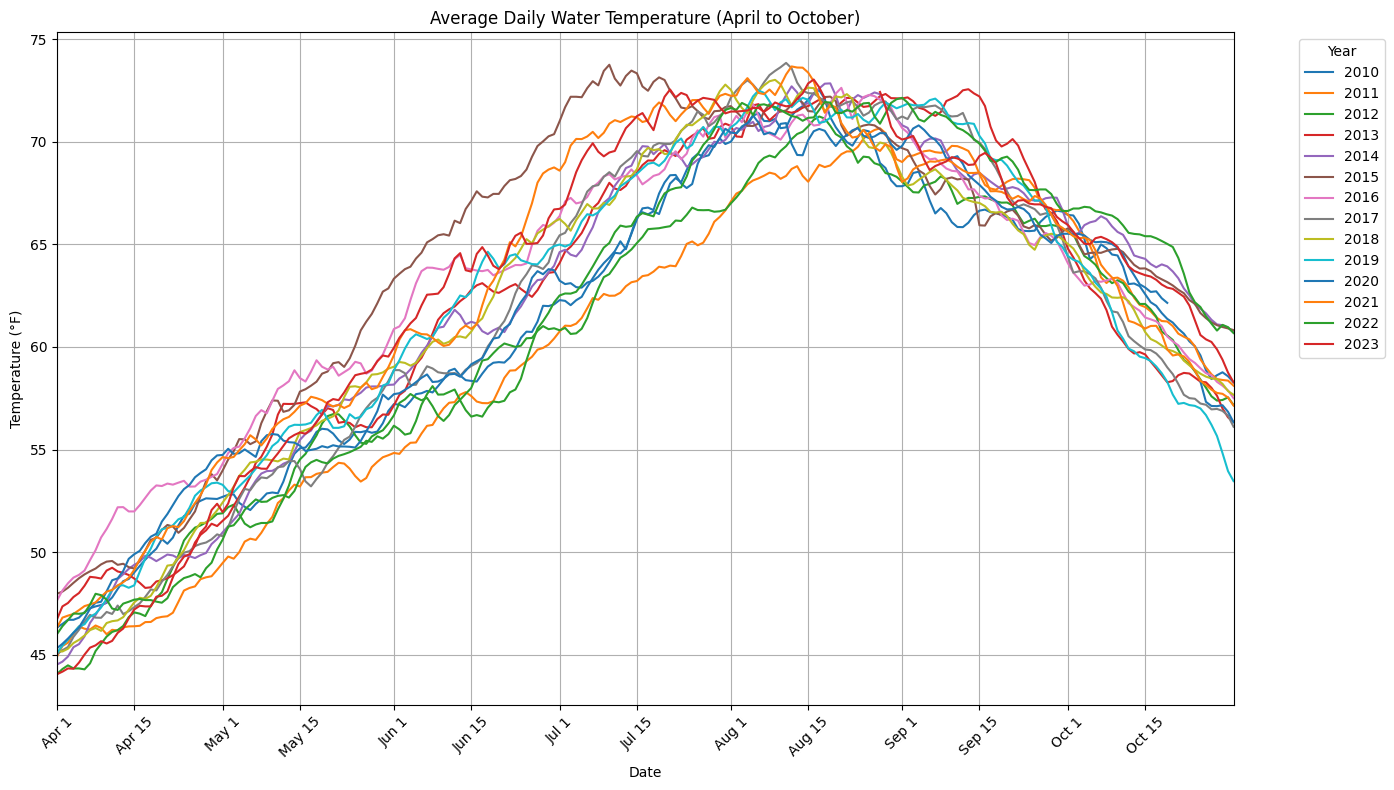

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV data into a Pandas DataFrame
file_path = 'columbia_river_temp_dalles.csv'  # Replace with your actual file path
df = pd.read_csv(file_path, parse_dates=['Date Time'], dayfirst=True)

# Rename the temperature column for ease of use
df.rename(columns={'TDDO.Temp-Water.Inst.1Hour.0.USGS-REV [F]': 'Temperature'}, inplace=True)

# Filter the data for entries from April to October
df['Month'] = df['Date Time'].dt.month
df_april_to_october = df[(df['Month'] >= 4) & (df['Month'] <= 10)]

# Calculate the relative day of the year (starting April 1 as day 1)
df_april_to_october['RelativeDay'] = df_april_to_october['Date Time'].apply(
    lambda x: (x - pd.Timestamp(year=x.year, month=4, day=1)).days + 1)

# Aggregate data by this relative day and year for average daily temperature
df_daily_avg = df_april_to_october.groupby(['RelativeDay', df_april_to_october['Date Time'].dt.year])['Temperature'].mean().unstack()

# Custom x-ticks and labels
days_in_months = [30, 31, 30, 31, 31, 30, 31]  # April to October
tick_marks = [1] + [sum(days_in_months[:i]) + 1 for i in range(1, len(days_in_months))]  # Start of each month
tick_marks += [15 + sum(days_in_months[:i]) for i in range(len(days_in_months))]  # Mid of each month
tick_labels = ['Apr 1', 'May 1', 'Jun 1', 'Jul 1', 'Aug 1', 'Sep 1', 'Oct 1',
               'Apr 15', 'May 15', 'Jun 15', 'Jul 15', 'Aug 15', 'Sep 15', 'Oct 15']

# Plotting
plt.figure(figsize=(14, 8))
for year in df_daily_avg.columns:
    plt.plot(df_daily_avg.index, df_daily_avg[year], label=year)

plt.title('Average Daily Water Temperature (April to October)')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.xticks(tick_marks, tick_labels, rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Calculate total days from April 1 to October 31
total_days_april_to_october = 214

# Set the x-axis limits
plt.xlim(1, total_days_april_to_october)
plt.tight_layout()

plt.show()



